In [1]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
import pandas as pd
# 붓꽃 데이터 세트를 로딩합니다. 
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다. 
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다. 
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다. 
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)


iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
X_train, X_test, y_train, y_test =  train_test_split(iris_data, iris_label, 
                                    test_size=0.2, random_state=11)

# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행 
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)


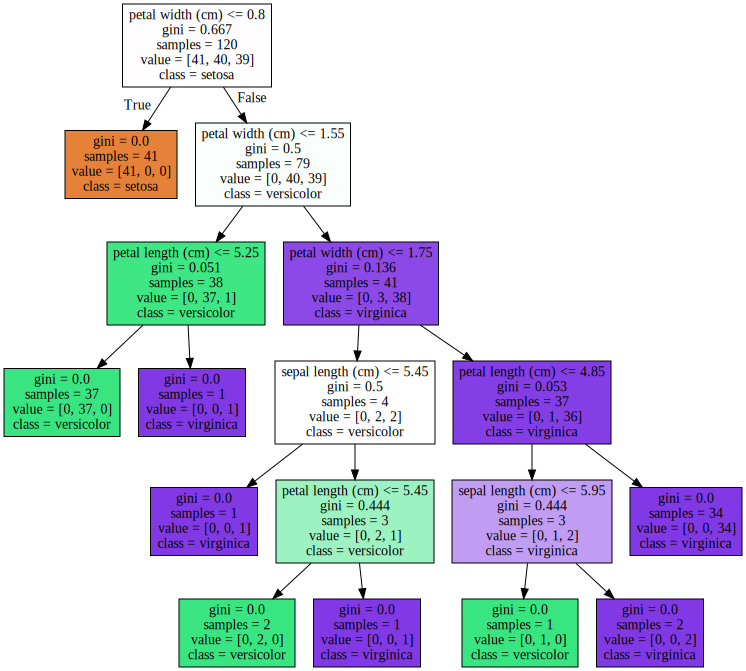

In [7]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_clf, out_file='tree.dot',class_names=iris.target_names,feature_names=iris.feature_names,impurity=True,filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [10]:
# max depth 변경
dt_clf = DecisionTreeClassifier(max_depth = 3, random_state = 56)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=56)

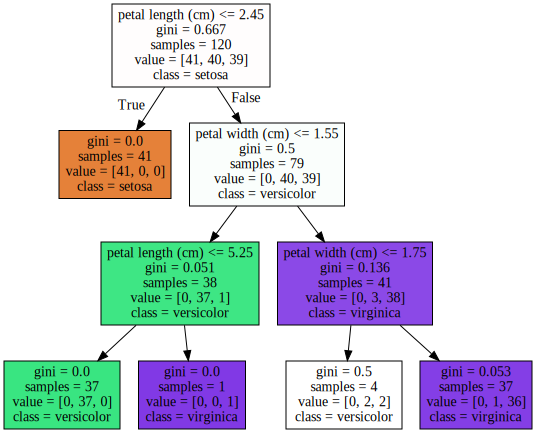

In [11]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_clf, out_file='tree.dot',class_names=iris.target_names,feature_names=iris.feature_names,impurity=True,filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [13]:
# min_samples_split 변경
dt_clf = DecisionTreeClassifier(min_samples_split = 4, random_state = 56)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=56)

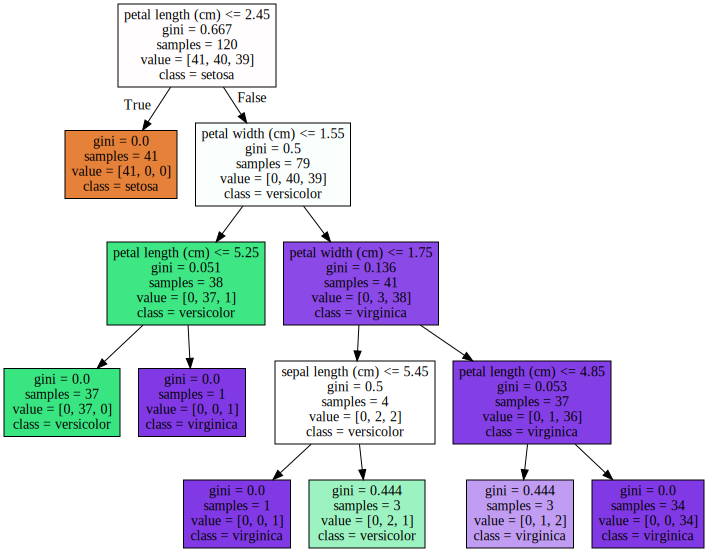

In [14]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_clf, out_file='tree.dot',class_names=iris.target_names,feature_names=iris.feature_names,impurity=True,filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [15]:
# min_samples_leaf 변경
dt_clf = DecisionTreeClassifier(min_samples_leaf = 4, random_state = 56)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=56)

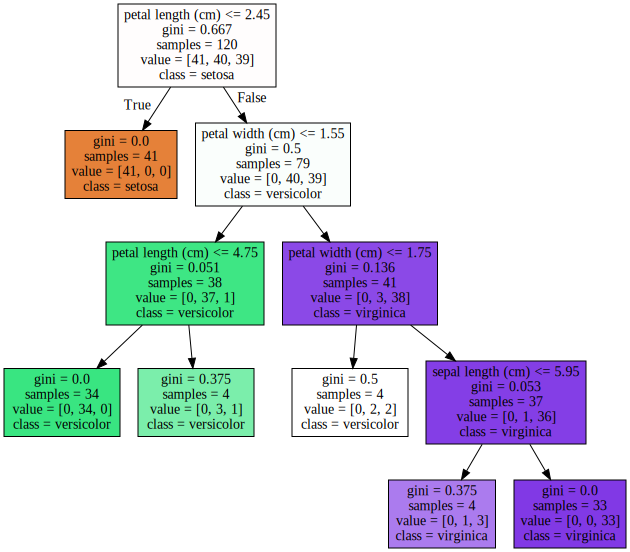

In [19]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_clf, out_file='tree.dot',class_names=iris.target_names,feature_names=iris.feature_names,impurity=True,filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Featuer Importances : 
[0.006 0.    0.546 0.448]
sepal length (cm) : 0.006
sepal width (cm) : 0.000
petal length (cm) : 0.546
petal width (cm) : 0.448


<AxesSubplot:>

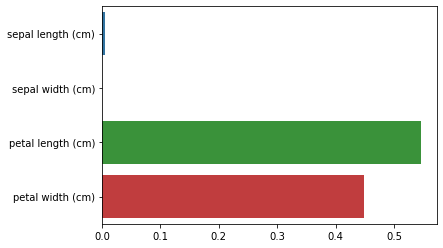

In [20]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Featuer Importances : \n{}".format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매칭
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print("{0} : {1:.3f}".format(name, value))

# feature importance를 column별로 시각화 하기
sns.barplot(x = dt_clf.feature_importances_, y = iris.feature_names)

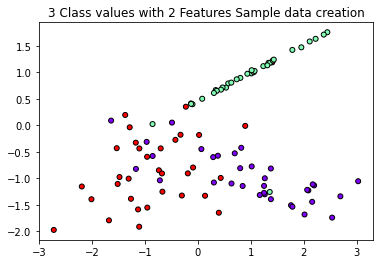

In [23]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

x_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=56)

plt.scatter(x_features[:,0],x_features[:,1],marker = 'o', c=y_labels, s=25, cmap="rainbow",edgecolor='k')